<a href="https://colab.research.google.com/github/abhinav-syl/Image-Classification/blob/main/Image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = 'nn.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/nn')
zip_ref.close()

In [ ]:
train_cat_dir = os.path.join('/nn/nn/train/cat')
train_dog_dir = os.path.join('/nn/nn/train/dog')
test_cat_dir = os.path.join('/nn/nn/test/cat')
test_dog_dir = os.path.join('/nn/nn/test/dog')


In [ ]:
train_cat_name= os.listdir(train_cat_dir)
print(train_cat_name[:3])
train_dog_name= os.listdir(train_dog_dir)
print(train_dog_name[:3])
test_cat_name= os.listdir(test_cat_dir)
print(test_cat_name[:3])

['cat.153.jpg', 'cat.456.jpg', 'cat.71.jpg']
['dog.163.jpg', 'dog.160.jpg', 'dog.55.jpg']
['cat-694730_1280.jpg', 'images (12).jpg', 'cat-2083492_640.jpg']


In [ ]:
print("length of cat: ", len(os.listdir(train_cat_dir)))
print("length of dog: ", len(os.listdir(train_dog_dir)))

length of cat:  596
length of dog:  534


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrow = 4
ncol = 4

pic_index=0

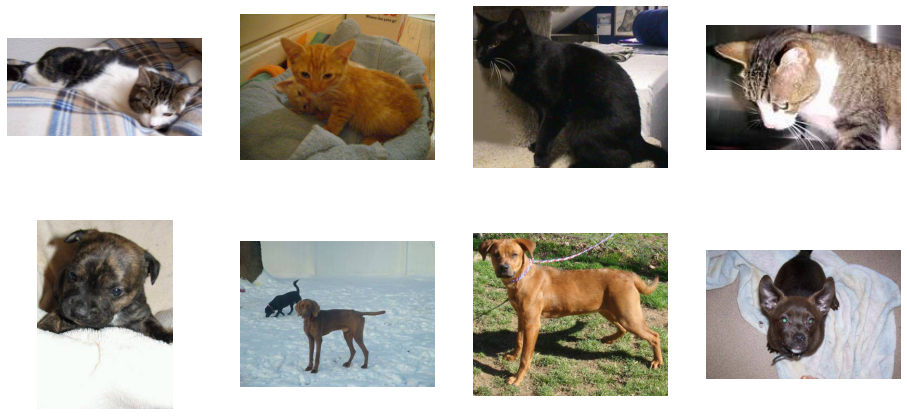

In [ ]:
fig = plt.gcf()
fig.set_size_inches(nrow *4, ncol *4)

pic_index += 4

next_cat_pic = [os.path.join(train_cat_dir, fname)
                for fname in train_cat_name[pic_index-4:pic_index]]
next_dog_pic = [os.path.join(train_dog_dir, fname)
                for fname in train_dog_name[pic_index-4:pic_index]]
for i, img_path in enumerate(next_cat_pic+next_dog_pic):
  ct = plt.subplot(nrow, ncol, i+1)
  ct.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()




In [ ]:
import tensorflow as tf


In [ ]:
model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(16,(3,3), activation = "relu", input_shape = (300,300,3)),
     tf.keras.layers.MaxPooling2D(2,2),
     #conv
     tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
     tf.keras.layers.MaxPooling2D(2,2),
     #conv3
     tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
     tf.keras.layers.MaxPooling2D(2,2),
     #conv4
     tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
     tf.keras.layers.MaxPooling2D(2,2),
     #conv5
     tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
     tf.keras.layers.MaxPooling2D(2,2),
     #flatten
     tf.keras.layers.Flatten(),
     #dense
     tf.keras.layers.Dense(64,activation= "relu"),
     #Dropout
     tf.keras.layers.Dropout(0.01),
     #output
     tf.keras.layers.Dense(1,activation = 'sigmoid')


])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.0005),
              metrics = ['acc']
              )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
train_generator = train_datagen.flow_from_directory(
                  '/nn/nn/train',
                  target_size = (300,300),
                  batch_size = 20,
                  class_mode = 'binary'
)
test_datagen = ImageDataGenerator(rescale = 1/255) 
test_generator = test_datagen.flow_from_directory(
                 '/nn/nn/test',
                 target_size = (300,300),
                 batch_size = 1,
                 class_mode = 'binary')


Found 1129 images belonging to 2 classes.
Found 9 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    epochs = 20,
    steps_per_epoch = 24,
    verbose = 1,
    #validation_data = test_generator
)

Epoch 1/20
24/24 [==============================] - 34s 95ms/step - loss: 0.7013 - acc: 0.5181
Epoch 2/20
24/24 [==============================] - 2s 85ms/step - loss: 0.6941 - acc: 0.5458
Epoch 3/20
24/24 [==============================] - 2s 85ms/step - loss: 0.6909 - acc: 0.4979
Epoch 4/20
24/24 [==============================] - 2s 86ms/step - loss: 0.6743 - acc: 0.6042
Epoch 5/20
24/24 [==============================] - 2s 82ms/step - loss: 0.6549 - acc: 0.6438
Epoch 6/20
24/24 [==============================] - 2s 81ms/step - loss: 0.6243 - acc: 0.6674
Epoch 7/20
24/24 [==============================] - 2s 78ms/step - loss: 0.5982 - acc: 0.6844
Epoch 8/20
24/24 [==============================] - 2s 80ms/step - loss: 0.6077 - acc: 0.6567
Epoch 9/20
24/24 [==============================] - 2s 79ms/step - loss: 0.5773 - acc: 0.7036
Epoch 10/20
24/24 [==============================] - 2s 78ms/step - loss: 0.6252 - acc: 0.6631
Epoch 11/20
24/24 [==============================] - 2s 79

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path = path , target_size = (300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 3)
  print(classes[0])
  if(classes[0]>0.5):
    print(fn + " is a cat.")
  else:
    print(fn + " is a dog.")